# 物体検出モデルのファインチューニング
## ライブラリのインストール

%pip install ultralytics plotly

In [33]:
from ultralytics import YOLO
from pathlib import Path
from PIL import Image

## モデルのダウンロードと学習

In [2]:
# 事前学習済みモデルをロード
model = YOLO("yolov8n.pt")
# 学習を実施
model.train(data="GlobalWheat2020.yaml", epochs=3)

New https://pypi.org/project/ultralytics/8.2.86 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.85 🚀 Python-3.10.13 torch-2.4.0+cu118 CUDA:0 (Quadro RTX 6000, 24220MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=GlobalWheat2020.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_f

100%|██████████| 6.45G/6.45G [23:15<00:00, 4.97MB/s]  
Unzipping /home/ubuntu/datasets/GlobalWheat2020/global-wheat-codalab-official.zip to /home/ubuntu/datasets/GlobalWheat2020/global-wheat-codalab-official...: 100%|██████████| 4716/4716 [00:41<00:00, 114.67file/s]


100%|██████████| 2.77M/2.77M [00:00<00:00, 11.8MB/s]
Unzipping /home/ubuntu/datasets/GlobalWheat2020/GlobalWheat2020_labels.zip to /home/ubuntu/datasets/GlobalWheat2020/labels...: 100%|██████████| 3384/3384 [00:00<00:00, 9059.90file/s]

Dataset download success ✅ (1440.4s), saved to /home/ubuntu/datasets

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128,

 17            [-1, 12]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 18                  -1  1    123648  ultralytics.nn.modules.block.C2f             [192, 128, 1]                 
 19                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 21                  -1  1    493056  ultralytics.nn.modules.block.C2f             [384, 256, 1]                 
 22        [15, 18, 21]  1    751507  ultralytics.nn.modules.head.Detect           [1, [64, 128, 256]]           
Model summary: 225 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


/home/ubuntu/finetuning_cookbook/.venv/lib/python3.10/site-packages/ultralytics/engine/trainer.py:268: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(enabled=self.amp)
train: Scanning /home/ubuntu/datasets/GlobalWheat2020/labels/arvalis_1... 3376 images, 46 backgrounds, 0 corrupt: 100%|██████████| 3422/3422 [00:28<00:00, 119.19it/s] 

train: New cache created: /home/ubuntu/datasets/GlobalWheat2020/labels/arvalis_1.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/home/ubuntu/finetuning_cookbook/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
val: Scanning /home/ubuntu/datasets/GlobalWheat2020/labels/ethz_1... 747 images, 0 backgrounds, 0 corrupt: 100%|██████████| 747/747 [00:00<00:00, 1161.81it/s]

val: New cache created: /home/ubuntu/datasets/GlobalWheat2020/labels/ethz_1.cache


Plotting labels to /home/ubuntu/finetuning_cookbook/runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /home/ubuntu/finetuning_cookbook/runs/detect/train3
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      3.81G      1.869      1.492      1.333        753        640: 100%|██████████| 214/214 [00:27<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.99it/s]


                   all        747      49603       0.87       0.83      0.887      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3      5.56G      1.659     0.9522      1.201        650        640: 100%|██████████| 214/214 [00:23<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.47it/s]


                   all        747      49603      0.894      0.877      0.929      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      4.67G      1.619        0.9      1.185        675        640: 100%|██████████| 214/214 [00:23<00:00,  9.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.72it/s]


                   all        747      49603      0.912      0.885      0.943      0.575

3 epochs completed in 0.026 hours.
Optimizer stripped from /home/ubuntu/finetuning_cookbook/runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from /home/ubuntu/finetuning_cookbook/runs/detect/train3/weights/best.pt, 6.2MB

Validating /home/ubuntu/finetuning_cookbook/runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.2.85 🚀 Python-3.10.13 torch-2.4.0+cu118 CUDA:0 (Quadro RTX 6000, 24220MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:39<00:00,  1.66s/it]


                   all        747      49603      0.912      0.887      0.946      0.577
Speed: 0.4ms preprocess, 0.9ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to /home/ubuntu/finetuning_cookbook/runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f544ba1df60>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

## 推論結果の取得

In [15]:
Path.home().joinpath("datasets/GlobalWheat2020/images/utokyo_1/").exists()


True


image 1/1 /home/ubuntu/datasets/GlobalWheat2020/images/utokyo_1/00175657-c80c-4ce1-a2d7-7d89592ee892.png: 640x640 33 wheat_heads, 7.5ms
Speed: 20.0ms preprocess, 7.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


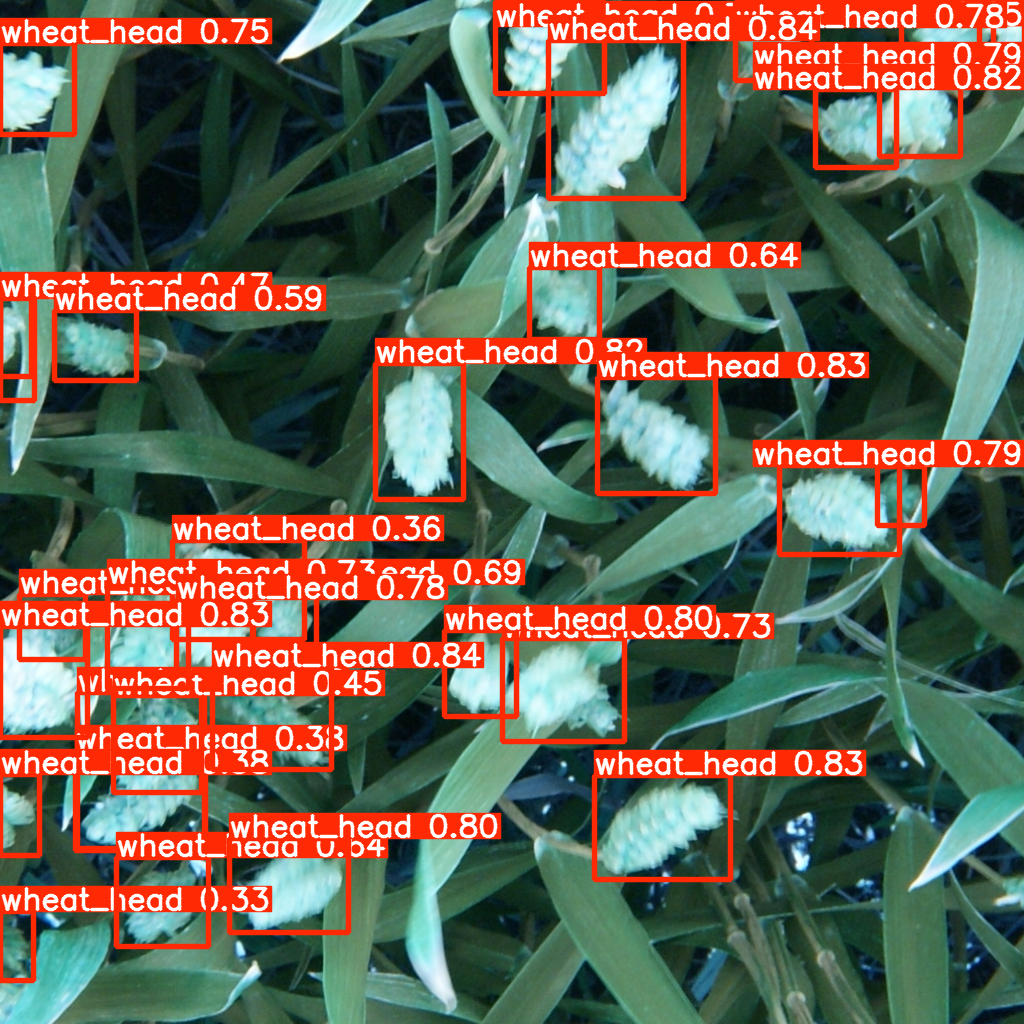

In [34]:
target = Path.home().joinpath("datasets/GlobalWheat2020/images/utokyo_1/00175657-c80c-4ce1-a2d7-7d89592ee892.png")
Image.fromarray(model.predict(target)[0].plot())